In [21]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import os 
from DataValidation import DataValidation
import warnings
warnings.filterwarnings('ignore')

In [22]:
data_path = os.path.join('..', 'src', 'analytics', 'ChargesChurn.csv')
df = pd.read_csv(data_path)
display(df)

,customerID,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,118.75,8672.45,0
1,8984-HPEMB,118.65,8477.6,0
2,5989-AXPUC,118.60,7990.05,0
3,5734-EJKXG,118.60,7365.7,0
4,8199-ZLLSA,118.35,7804.15,1
...,...,...,...,...
7038,0621-CXBKL,18.70,1005.7,0
7039,9945-PSVIP,18.70,383.65,0
7040,0827-ITJPH,18.55,689,0
7041,9764-REAFF,18.40,1057.85,0


In [23]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [25]:
DataValidation.unique(data=df, column='customerID')

nao há valores nulos em: customerID


In [26]:
DataValidation.NaN(data=df)

nao há valores nulos em: customerID
nao há valores nulos em: MonthlyCharges
valores nulos em TotalCharges: 11
nao há valores nulos em: TotalCharges
nao há valores nulos em: Churn


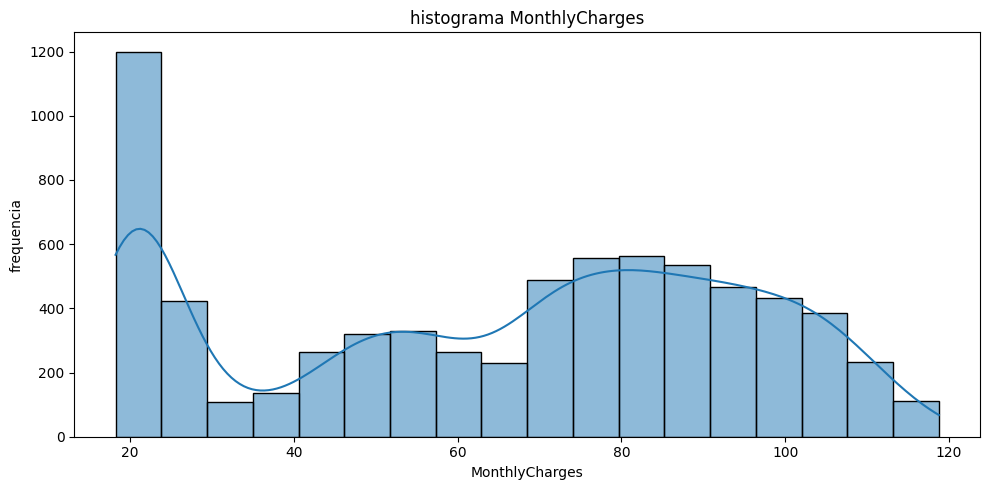

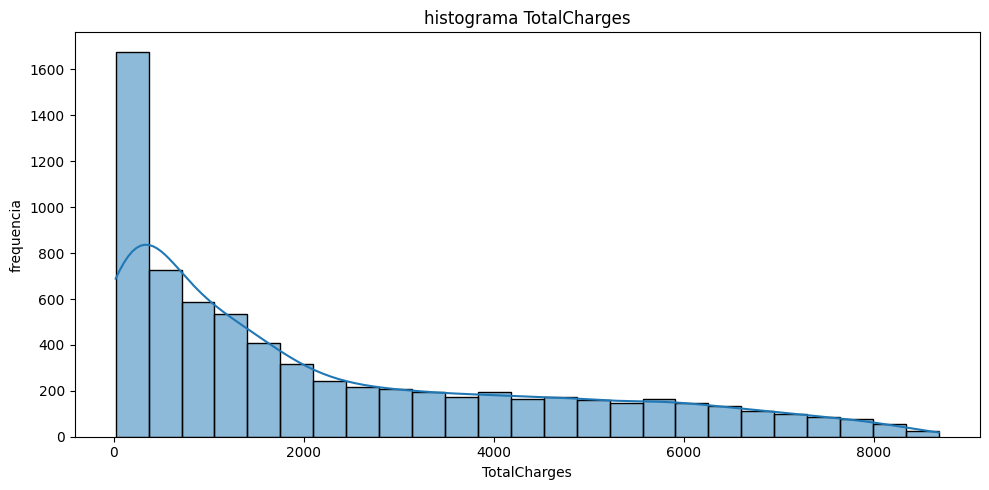

In [27]:
col = ['MonthlyCharges', 'TotalCharges']
for num in col:
    plt.figure(figsize=(10,5))
    plt.title(f'histograma {num}')
    sns.histplot(data= df[num], kde=True, edgecolor='black')
    plt.xlabel(f'{num}')
    plt.ylabel('frequencia')
    plt.tight_layout()
    plt.show()

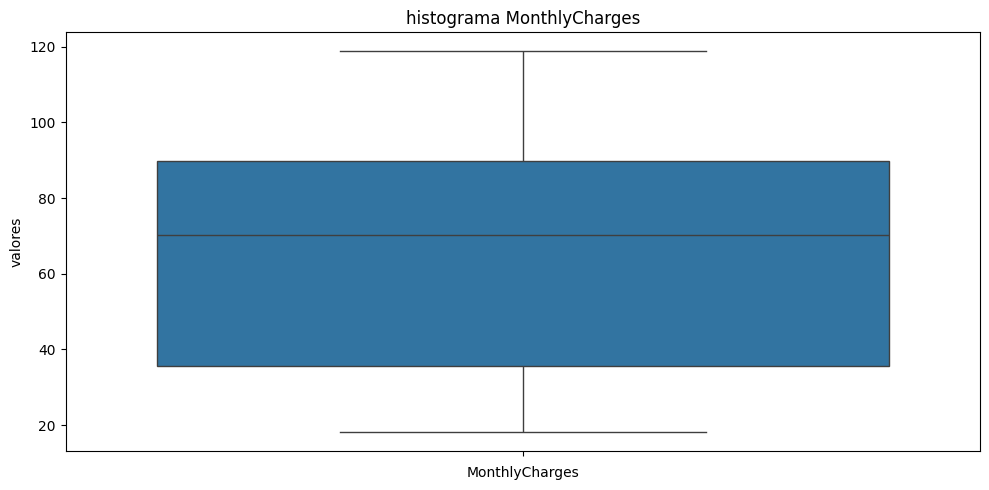

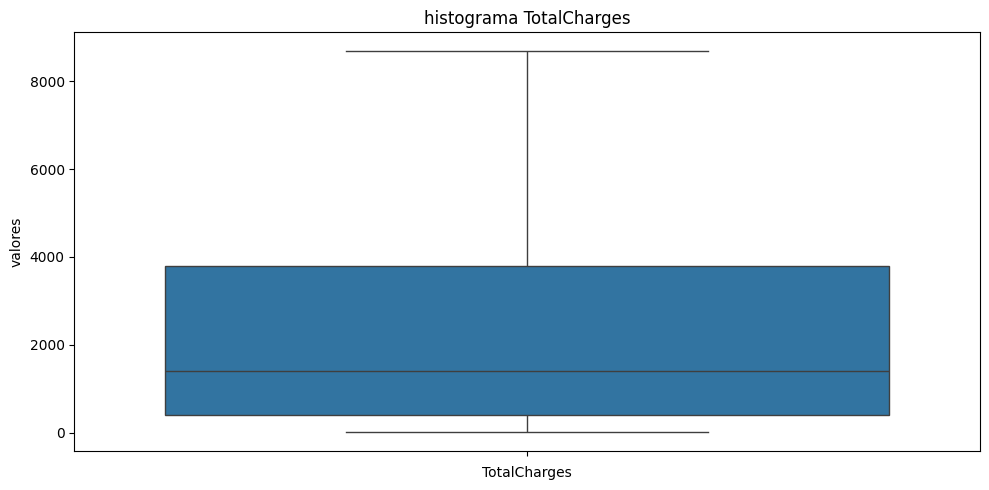

In [28]:
# grafico de caixa 
for box in col:
    plt.figure(figsize=(10,5))
    plt.title(f'histograma {box}')
    sns.boxplot(data=df[box])
    plt.xlabel(f'{box}')
    plt.ylabel('valores')
    plt.tight_layout()
    plt.show()

In [29]:
df.columns

Index(['customerID', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

<Axes: title={'center': 'mapa de correçao entre Cargas e Churn'}>

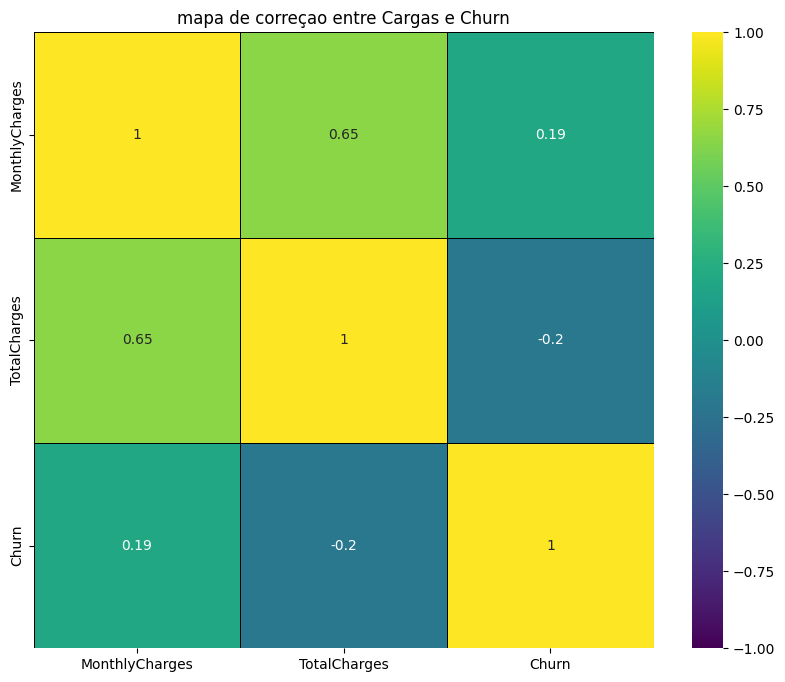

In [30]:
corr_cols = ['MonthlyCharges', 'TotalCharges', 'Churn']
corr = df[corr_cols].corr()
plt.figure(figsize=(10,8))
plt.title('mapa de correçao entre Cargas e Churn')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=.5, 
            linecolor='black', cbar=True)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

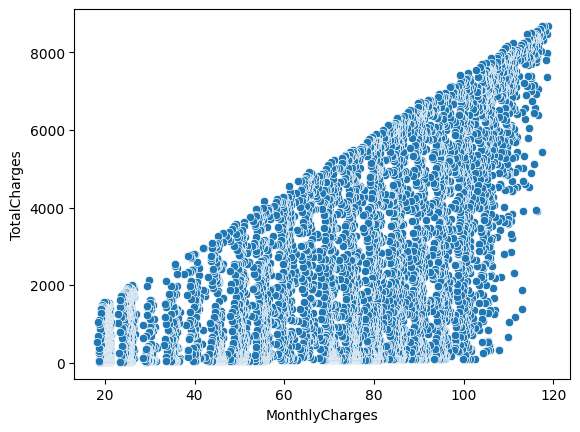

In [31]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

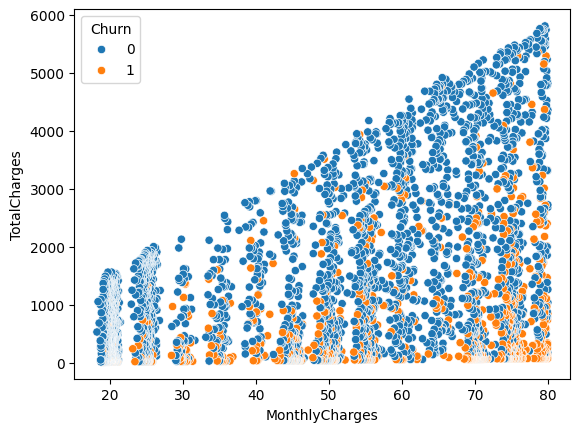

In [32]:
values = df[df['MonthlyCharges'] < 80]
sns.scatterplot(data=values, x='MonthlyCharges', y='TotalCharges', hue='Churn')

In [33]:
values[corr_cols].corr()

,MonthlyCharges,TotalCharges,Churn
MonthlyCharges,1.000000,0.430803,0.237052
TotalCharges,0.430803,1.000000,-0.243736
Churn,0.237052,-0.243736,1.000000


Vemos uma significativa diferença entre as correlaçoes entre o churn. Clientes que fazem recargas com frequencia, logo acumulam as mesmas, que aumenta o coeficiente de correlaçao com churn. Nao é um valor muito expressivo em relaçao ao intervalo de 0-1. Porém, se olharmos para o universo de pessoas que fazer mais/menos de 80 recargas por mes, vemos uma diferença entre os valores: 

Frequencia de recargas menores que 80:

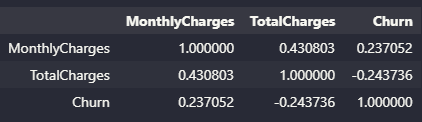

Frequencia de recargas menores que 80:

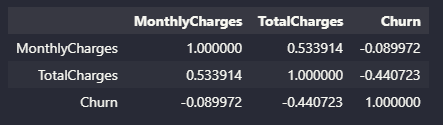

In [34]:
df

,customerID,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,118.75,8672.45,0
1,8984-HPEMB,118.65,8477.60,0
2,5989-AXPUC,118.60,7990.05,0
3,5734-EJKXG,118.60,7365.70,0
4,8199-ZLLSA,118.35,7804.15,1
...,...,...,...,...
7038,0621-CXBKL,18.70,1005.70,0
7039,9945-PSVIP,18.70,383.65,0
7040,0827-ITJPH,18.55,689.00,0
7041,9764-REAFF,18.40,1057.85,0


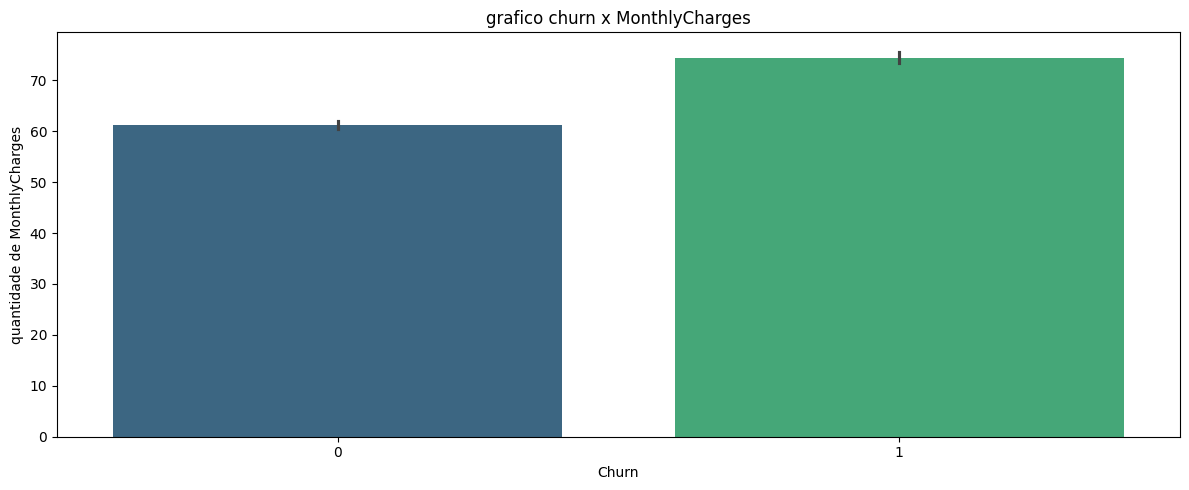

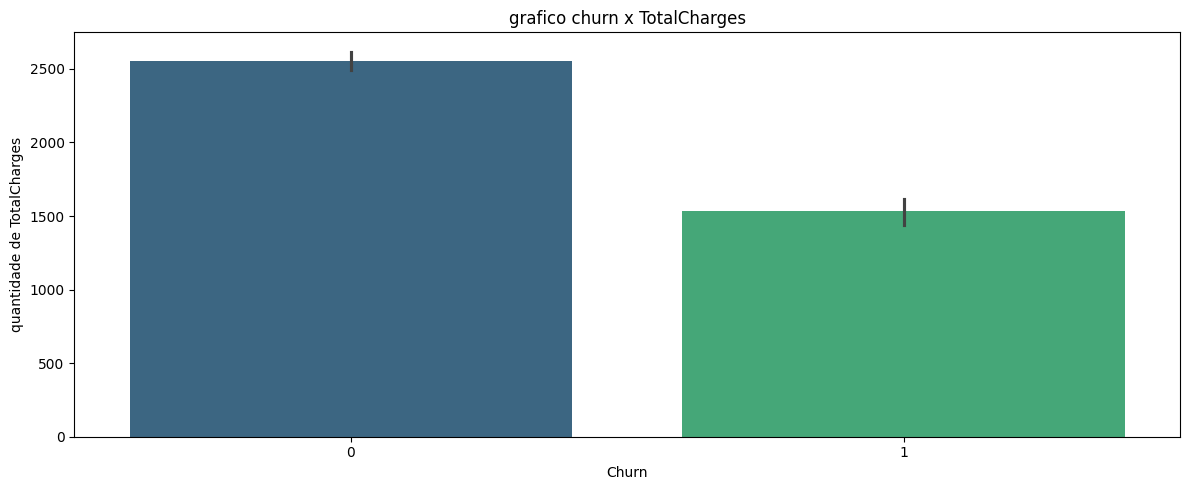

In [36]:
for i in col:
    plt.figure(figsize=(12,5))
    plt.title(f'grafico churn x {i}')
    sns.barplot(data=df, x='Churn', y=i, palette='viridis')
    plt.ylabel(f'quantidade de {i}')
    plt.tight_layout()
    plt.show()